In [22]:
import numpy as np

import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import lightgbm as lgb

In [23]:
dataset = datasets.fetch_covtype()

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state=179)

In [24]:
def learning_rate_decay(initial_lr, decay_rate):
    def _decay(iteration):
        return initial_lr * (decay_rate ** iteration)
    return _decay

In [25]:
metrics = {}
callbacks = [
    lgb.log_evaluation(period=15),
    lgb.record_evaluation(metrics),
    lgb.early_stopping(15),
    lgb.reset_parameter(learning_rate=learning_rate_decay(0.09, 0.999))
]

CPU times: user 78 µs, sys: 1 µs, total: 79 µs
Wall time: 86.8 µs


In [26]:
model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=150,
    num_leaves=120,
    learning_rate=0.09,
    force_row_wise=True
)

In [27]:
%%time
model = model.fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric='auc_mu', callbacks=callbacks)

[LightGBM] [Info] Total Bins 2253
[LightGBM] [Info] Number of data points in the train set: 435759, number of used features: 53
[LightGBM] [Info] Start training from score -1.004939
[LightGBM] [Info] Start training from score -0.721183
[LightGBM] [Info] Start training from score -2.788389
[LightGBM] [Info] Start training from score -5.368561
[LightGBM] [Info] Start training from score -4.103842
[LightGBM] [Info] Start training from score -3.513140
[LightGBM] [Info] Start training from score -3.344932
Training until validation scores don't improve for 15 rounds
[15]	valid_0's auc_mu: 0.991161	valid_0's multi_logloss: 0.457747
[30]	valid_0's auc_mu: 0.994448	valid_0's multi_logloss: 0.346657
[45]	valid_0's auc_mu: 0.99573	valid_0's multi_logloss: 0.302868
[60]	valid_0's auc_mu: 0.996388	valid_0's multi_logloss: 0.273809
[75]	valid_0's auc_mu: 0.996781	valid_0's multi_logloss: 0.252963
[90]	valid_0's auc_mu: 0.997185	valid_0's multi_logloss: 0.237452
[105]	valid_0's auc_mu: 0.997565	valid

In [30]:
f1_score(y_test, model.predict(X_test), average="macro")

0.9165993281538187

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='auc_mu'>

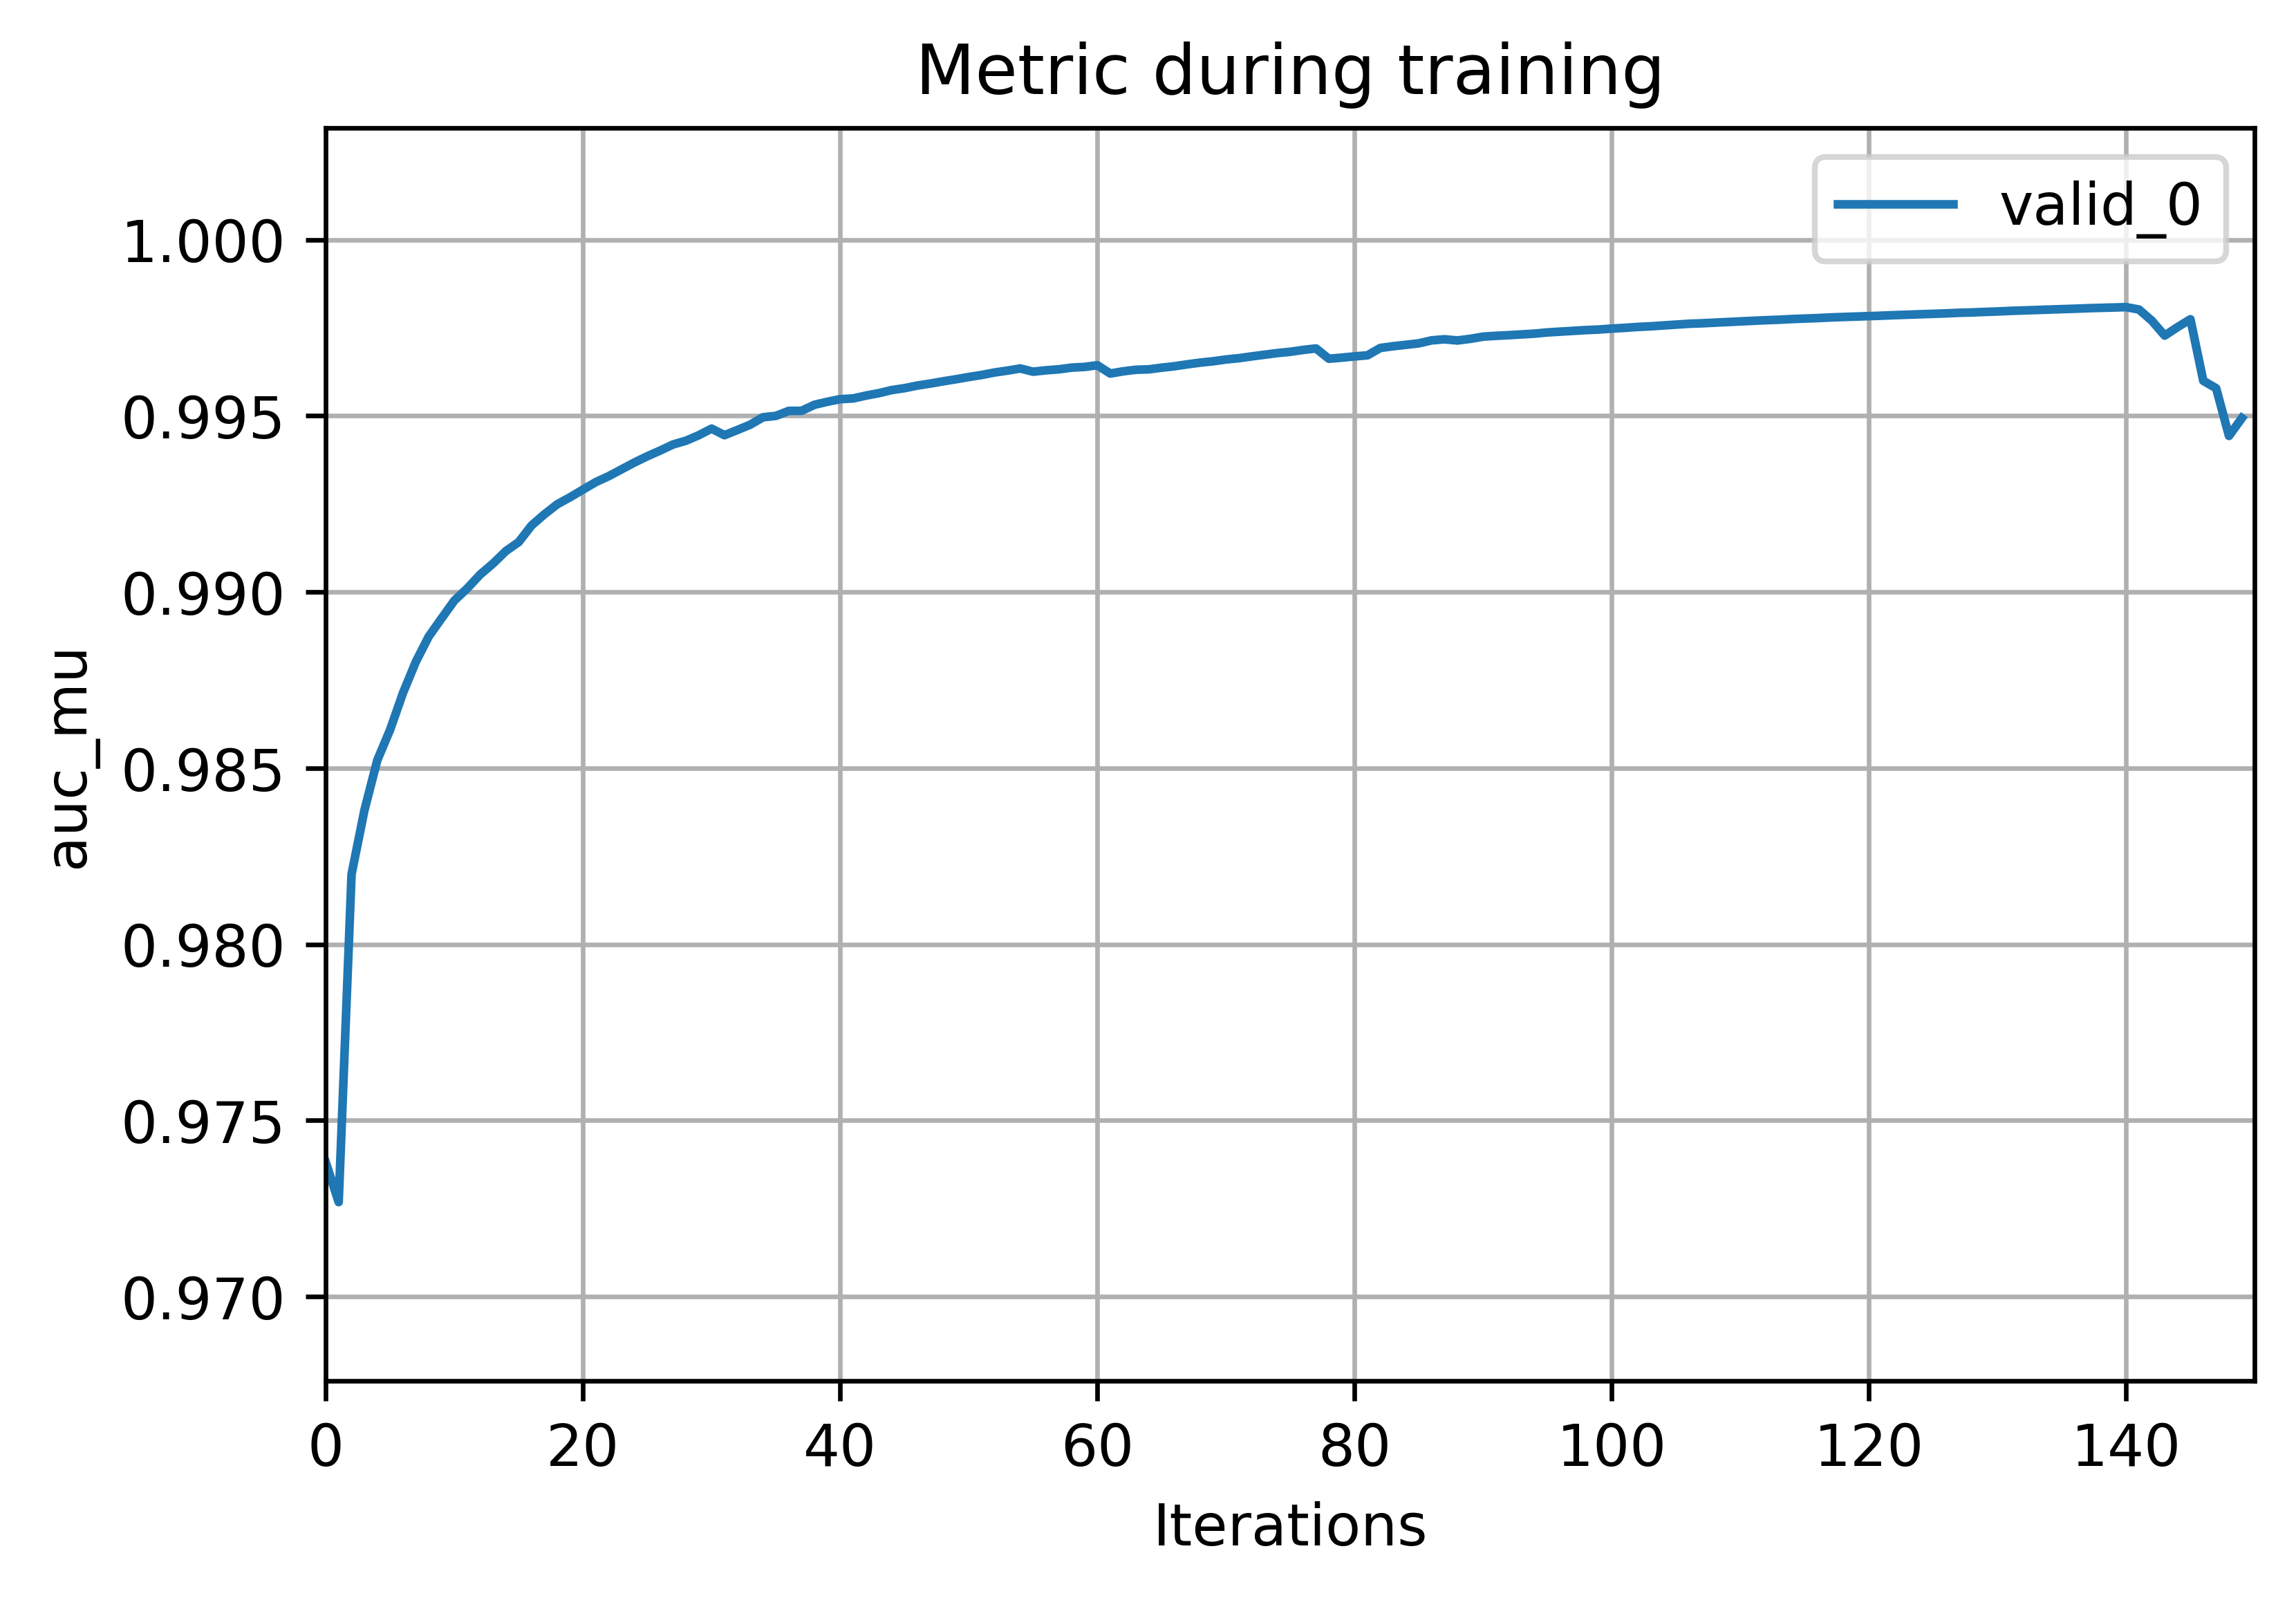

In [29]:
lgb.plot_metric(metrics, 'auc_mu')